# EMAIL-SPAM-CLASSIFIER

### Import the dataset with required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ed = pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
ed.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2164,ham,"Nothing really, just making sure everybody's u...",NaN,NaN,NaN
4690,ham,Surly ill give it to you:-) while coming to re...,NaN,NaN,NaN
4928,spam,Got what it takes 2 take part in the WRC Rally...,NaN,NaN,NaN
179,ham,Hi! You just spoke to MANEESHA V. We'd like to...,NaN,NaN,NaN
3717,ham,Cool. Do you like swimming? I have a pool and ...,NaN,NaN,NaN


In [5]:
ed.shape

(5572, 5)

In [6]:
ed.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [8]:
#Now drop the unuse column

ed.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
ed.sample(5)

,v1,v2
3047,ham,Die... Now i have e toot fringe again...
3267,ham,Which is why i never wanted to tell you any of...
3121,spam,Free entry in 2 a weekly comp for a chance to ...
2171,ham,I wont. So wat's wit the guys
1450,ham,Msg me when rajini comes.


In [10]:
#Now rename the column name

ed.rename(columns={'v1' : 'Catagory','v2' : 'Email Body'},inplace=True)

In [11]:
ed.sample(5)

,Catagory,Email Body
2943,spam,We currently have a message awaiting your coll...
858,ham,Spoons it is then okay?
2112,spam,You are a winner you have been specially selec...
1044,spam,We know someone who you know that fancies you....
2325,ham,Apps class varaya elaya.


In [12]:
#Now apply the LableEncoder method on ""Catagory"" column

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
ed['Catagory'] = encoder.fit_transform(ed['Catagory'])

In [14]:
#Here in the Catagory column have two value 1st Ham and 2nd spam.
#So after apply the LabelEncoder method change the vaule from 0 or 1.
#Here Ham=0 and Spam=1

ed.sample(10)

,Catagory,Email Body
2586,0,If you don't respond imma assume you're still ...
1301,0,I tot u reach liao. He said t-shirt.
3519,0,No it will reach by 9 only. She telling she wi...
4519,0,What to think no one saying clearly. Ok leave ...
643,0,Ya very nice. . .be ready on thursday
2898,0,"Aight, I should be there by 8 at the latest, p..."
4393,0,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
3145,0,\SHIT BABE.. THASA BIT MESSED UP.YEH
1203,0,Thanks for understanding. I've been trying to ...
3274,0,Hurry home u big butt. Hang up on your last ca...


In [15]:
#Now check duplicate values and removed.

ed.duplicated().sum()

403

In [16]:
ed = ed.drop_duplicates(keep='first')

In [17]:
ed.duplicated().sum()

0

In [18]:
ed.shape

(5169, 2)

# EDA

In [19]:
ed.sample(5)

,Catagory,Email Body
5262,0,Did you see that film:)
2539,0,Hmmm:)how many players selected?
5417,0,Nope. I just forgot. Will show next week
3633,0,Its a big difference. &lt;#&gt; versus &lt;...
3039,0,One day a crab was running on the sea shore..T...


In [20]:
ed['Catagory'].value_counts()

0    4516
1     653
Name: Catagory, dtype: int64

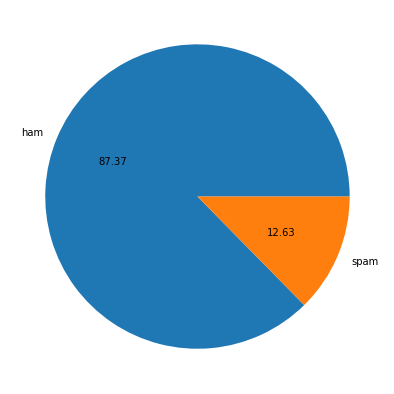

In [21]:
#Now create PieChart for better understanding
fig, ax = plt.subplots(figsize =(10, 7))
colors = ( "orange", "cyan")
plt.pie(ed['Catagory'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [22]:
#Now we identifie the data is inbalanced, so we deep drive for EDA with NLTK liberaies.

!pip install nltk

In [23]:
import nltk

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
#Now we have creat a 3-columns for help of email body.
#Let's see the lenth of email body.

ed['num_chr'] = ed['Email Body'].apply(len)

In [26]:
ed.sample(5)

,Catagory,Email Body,num_chr
1018,0,Nope watching tv at home... Not going out. V b...,53
4436,0,How come u got nothing to do?,29
3221,0,"Hi, my love! How goes that day? Fuck, this mor...",150
5432,0,Thanx a lot 4 ur help!,22
3642,0,"Sorry, left phone upstairs. OK, might be hecti...",107


In [27]:
#We calculate num. of words for each email body with help of NLTK.

ed['num_words'] = ed['Email Body'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words
528,1,You will recieve your tone within the next 24h...,111,21
1895,0,"Uh, heads up we don't have THAT much left",41,11
3956,0,Where is that one day training:-),33,9
3905,0,Went fast asleep dear.take care.,32,6
4023,0,Wat time Ì_ wan today?,22,6


In [29]:
#Apply the same rule for calculated sentences.

ed['num_sent'] = ed['Email Body'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent
4008,0,Ha... Then we must walk to everywhere... Canno...,112,25,3
1232,0,1's finish meeting call me.,27,7,1
2487,0,K ill drink.pa then what doing. I need srs mod...,78,20,2
362,0,Check audrey's status right now,31,6,1
2619,1,<Forwarded from 21870000>Hi - this is your Mai...,173,32,3


In [31]:
ed[['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
#Now we describe the catagory based like Ham and spam.

#Ham
ed[ed['Catagory'] == 0][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
#Spam
ed[ed['Catagory'] == 1][['num_chr','num_words','num_sent']].describe()

,num_chr,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


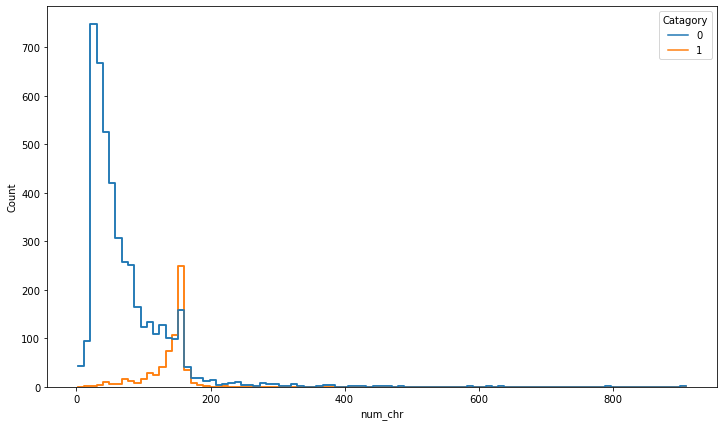

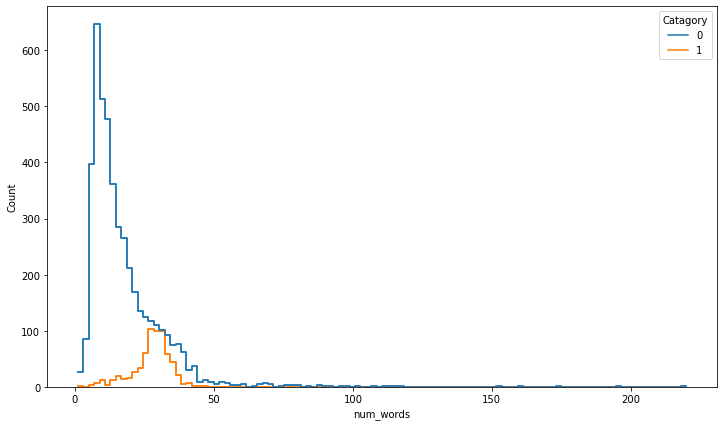

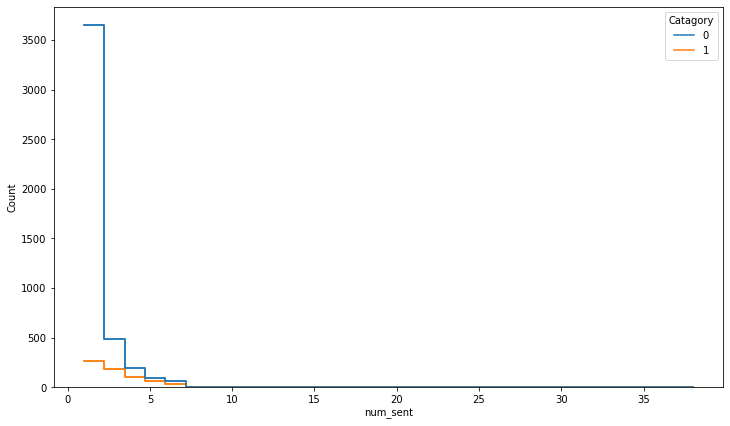

In [34]:
#Create Histogram.

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_chr", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
sns.histplot(data=ed, x="num_words", hue="Catagory",fill=False, element="step")
plt.show()

plt.figure(figsize=(12,7))
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
sns.histplot(data=ed, x="num_sent", hue="Catagory",fill=False, element="step",bins=30)
plt.show()

<Figure size 864x504 with 0 Axes>

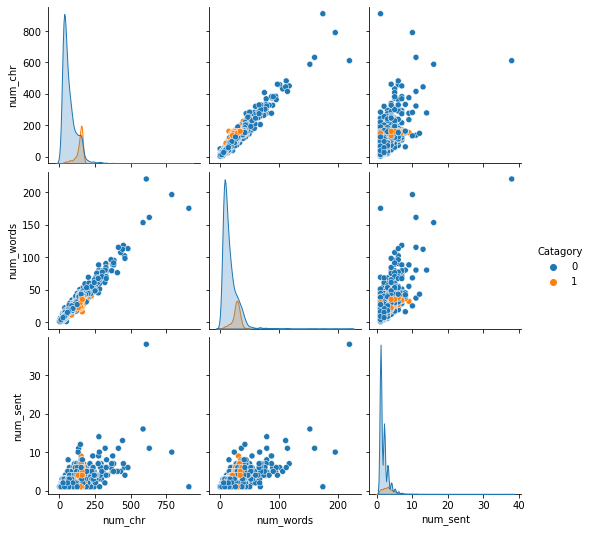

In [35]:
#Creat PaiPlot for define the relationship b/w columns.

plt.figure(figsize=(12,7))
sns.pairplot(ed,hue="Catagory")
plt.show()

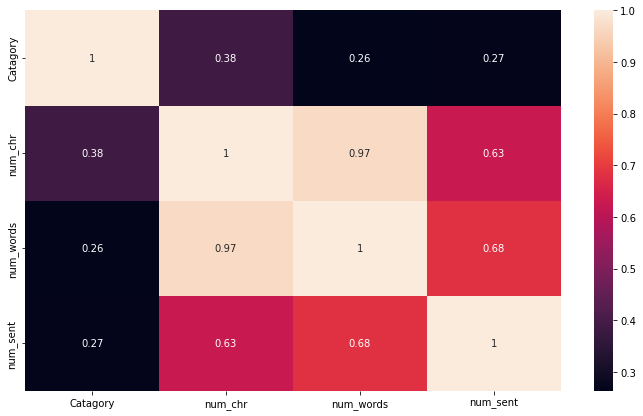

In [36]:
#Corelation heatmap

plt.figure(figsize=(12,7))
sns.heatmap(ed.corr(),annot=True)
plt.show()

# Data Preprocessing

### FlowChart:

#### 1.Lower Case >>>> 2.Tokenization >>> 3.Removing special charector >>> 4.Removing stop words and punctuations >>> 5.Stemming

In [37]:
def transform_text(text):
#Lowercase    
    text = text.lower()
    
#Tokenization    
    text = nltk.word_tokenize(text)
    
#RemoveSpecialChar    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
#StopWords & Stemming    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)   

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Loving')

'love'

In [42]:
transform_text('Host-based IDPS for linux systems.')

'idp linux system'

In [43]:
ed['Email Body'][1500]

'Host-based IDPS for linux systems.'

In [44]:
ed['Transform Text'] = ed['Email Body'].apply(transform_text)

In [45]:
ed.sample(5)

,Catagory,Email Body,num_chr,num_words,num_sent,Transform Text
4842,0,I need details about that online job.,37,8,1,need detail onlin job
952,0,Beautiful Truth against Gravity.. Read careful...,159,33,2,beauti truth graviti read care heart feel ligh...
3155,0,Long time. You remember me today.,33,8,2,long time rememb today
2554,0,I'll reach in ard 20 mins ok...,31,9,1,reach ard 20 min ok
4809,0,"Honey, can you pls find out how much they sell...",151,33,3,honey pl find much sell predict nigeria mani t...


### Create WordCloud

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

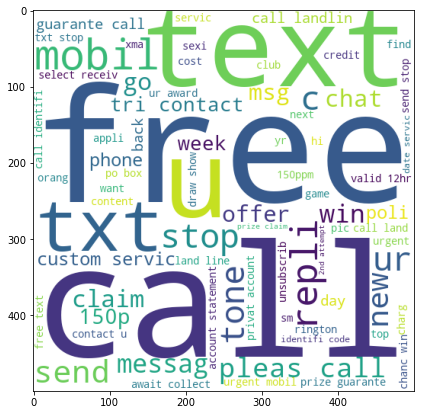

In [47]:
Spam_WC = wc.generate(ed[ed['Catagory'] == 1]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Spam_WC)

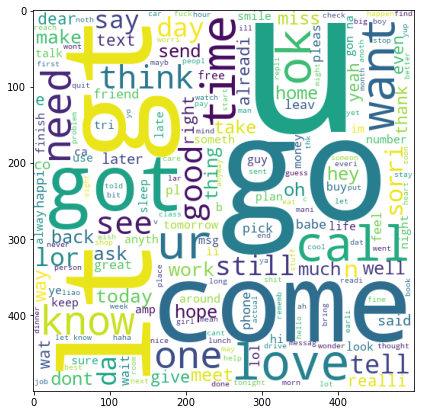

In [48]:
Ham_WC = wc.generate(ed[ed['Catagory'] == 0]['Transform Text'].str.cat(sep=" "))

plt.figure(figsize=(8,7))
plt.imshow(Ham_WC)

### Top 20 words for Spam & Ham massages.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


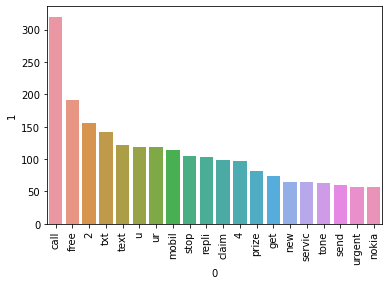

In [49]:
spam_corpus = []
for msg in ed[ed['Catagory'] == 1]['Transform Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
len(spam_corpus)

#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

In [50]:
Ham_corpus = []
for msg in ed[ed['Catagory'] == 0]['Transform Text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [51]:
len(Ham_corpus)

35402

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


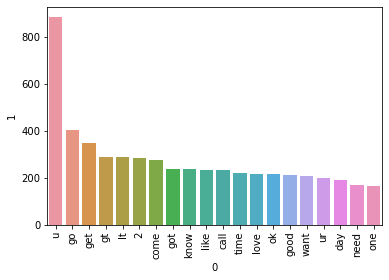

In [52]:
#Viz:

from collections import Counter
sns.barplot(pd.DataFrame(Counter(Ham_corpus).most_common(20))[0],pd.DataFrame(Counter(Ham_corpus).most_common(20))[1])

plt.xticks(rotation='vertical')
plt.show()

## 4th Step Model Building

#### Text vectorization using Bag of words method

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [54]:
A = cv.fit_transform(ed['Transform Text']).toarray()

In [55]:
#5169=SMS & 6708=Words
A.shape

(5169, 6708)

In [56]:
B = ed['Catagory'].values

In [57]:
B

array([0, 0, 1, ..., 0, 0, 0])

### Now train test split

In [58]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

### Model from CountVectorizer

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [60]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [61]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [62]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [63]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


### Model from TFIDVectorizer

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [65]:
A = tfidf.fit_transform(ed['Transform Text']).toarray()

In [66]:
#5169=SMS & 6708=Words
A.shape

(5169, 3000)

In [67]:
B = ed['Catagory'].values

In [68]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test = train_test_split(A,B,test_size=0.2,random_state=2)

In [69]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(A_train,B_train)
b_pred1 = gnb.predict(A_test)
print(accuracy_score(B_test,b_pred1))
print(confusion_matrix(B_test,b_pred1))
print(precision_score(B_test,b_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [72]:
mnb.fit(A_train,B_train)
b_pred2 = mnb.predict(A_test)
print(accuracy_score(B_test,b_pred2))
print(confusion_matrix(B_test,b_pred2))
print(precision_score(B_test,b_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [73]:
bnb.fit(A_train,B_train)
b_pred3 = bnb.predict(A_test)
print(accuracy_score(B_test,b_pred3))
print(confusion_matrix(B_test,b_pred3))
print(precision_score(B_test,b_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))